In [24]:
!pip install SciencePlots

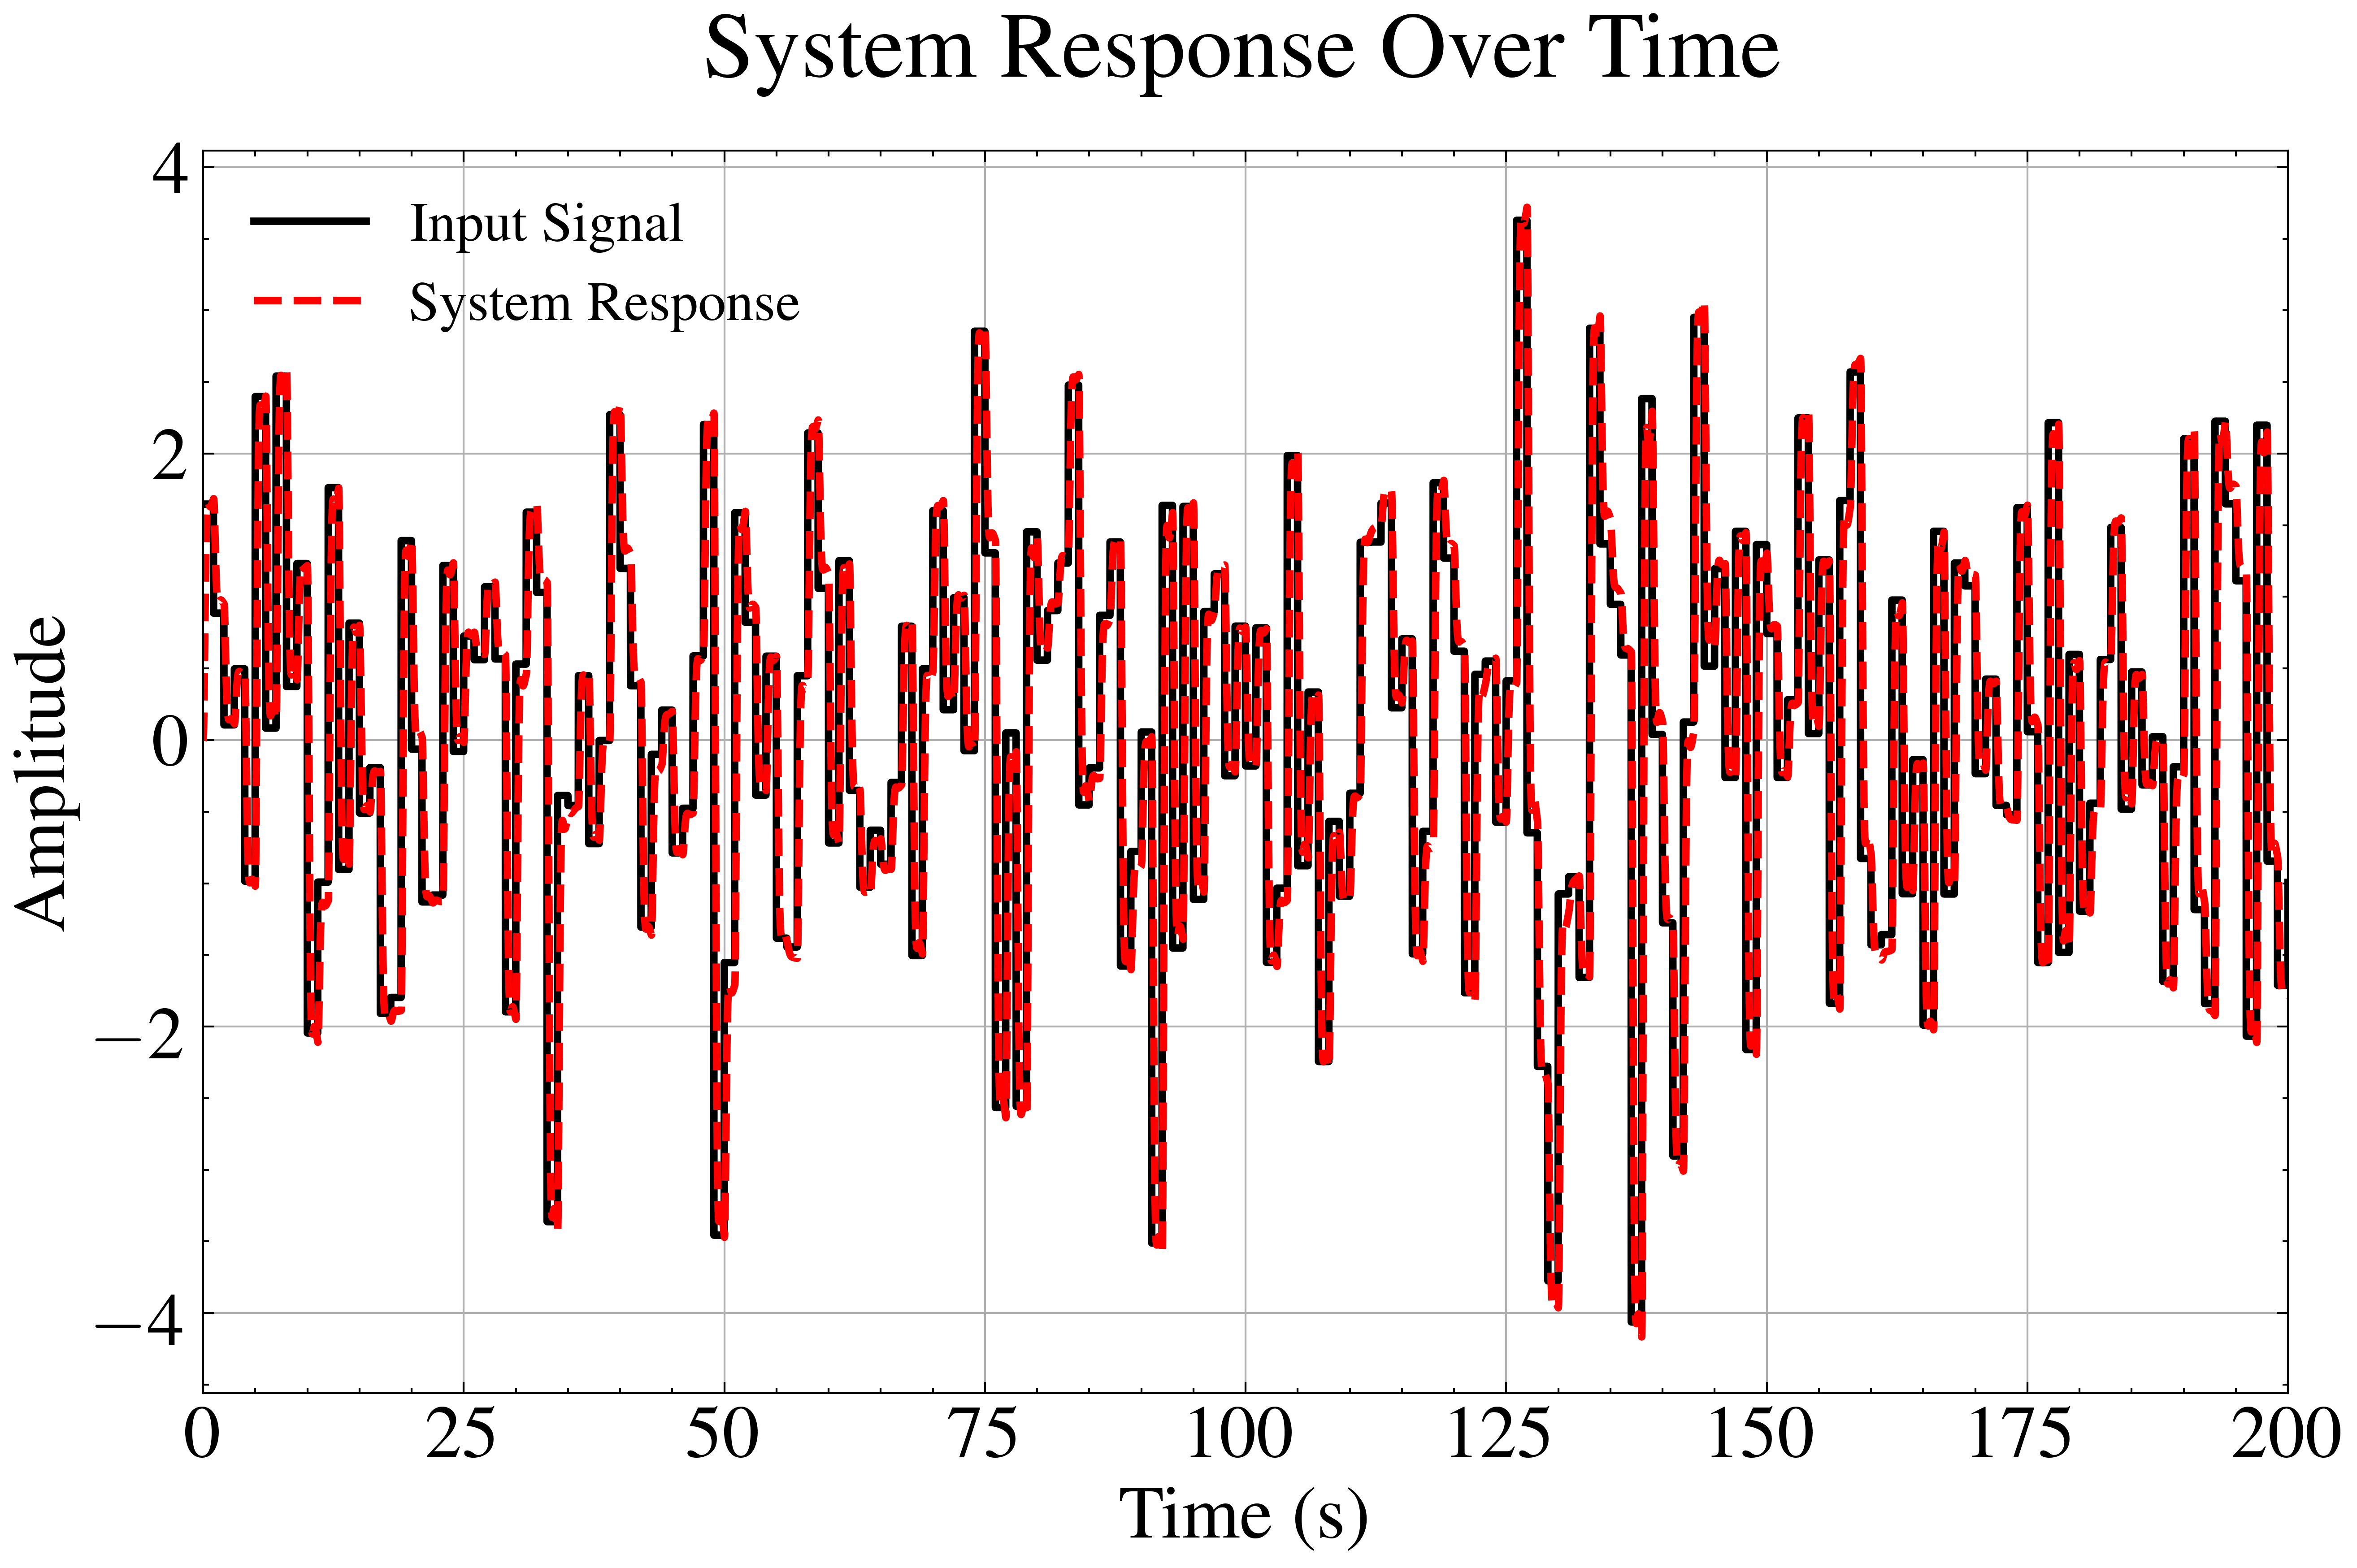

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

file_path = 'D:/UAS_Pemodelan_Sistem_Identifikasi/simulation_data.xlsx'
data = pd.read_excel(file_path)

time = data['Time']
input_signal = data['InputSignal']
system_response = data['SystemResponse']

plt.style.use('science')
plt.style.use('ieee')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time, input_signal, label='Input Signal', linewidth=2, color='black')
ax.plot(time, system_response, label='System Response', linewidth=2, color='red')

ax.set_xlim([0, 200])

ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)

legend = ax.legend(fontsize=15)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

ax.set_title('System Response Over Time', fontsize=25, pad=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True)

plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Load the dataset

# Extract columns
time = data['Time']
input_signal = data['InputSignal']
system_response = data['SystemResponse']

# Prepare the dataset for ARX model
# Typically ARX model requires past values of input and output.
# Here we will use past 2 values for simplicity. This can be tuned.

def create_arx_features(input_signal, system_response, n_lags=2):
    X = []
    y = []
    for i in range(n_lags, len(input_signal)):
        features = list(input_signal[i-n_lags:i]) + list(system_response[i-n_lags:i])
        X.append(features)
        y.append(system_response[i])
    return np.array(X), np.array(y)

n_lags = 2
X, y = create_arx_features(input_signal, system_response, n_lags=n_lags)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize the data
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Train a nonlinear model (MLPRegressor as an example)
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=1)
model.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate performance metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R²: 0.999622432902414
MAE: 0.013327181282176267
MSE: 0.0005444297027428624
RMSE: 0.023333017437589643


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Separate input (X) and output (y)
X = data[['InputSignal']]  # Input features
y = data['SystemResponse']  # Target variable

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Step 4: Initialize the model (Linear Regression)
model = RandomForestRegressor()

# Step 5: Train the model on the training data
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R2 Score: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R2 Score: 0.76
Mean Absolute Error: 0.42
Mean Squared Error: 0.43
Root Mean Squared Error: 0.65


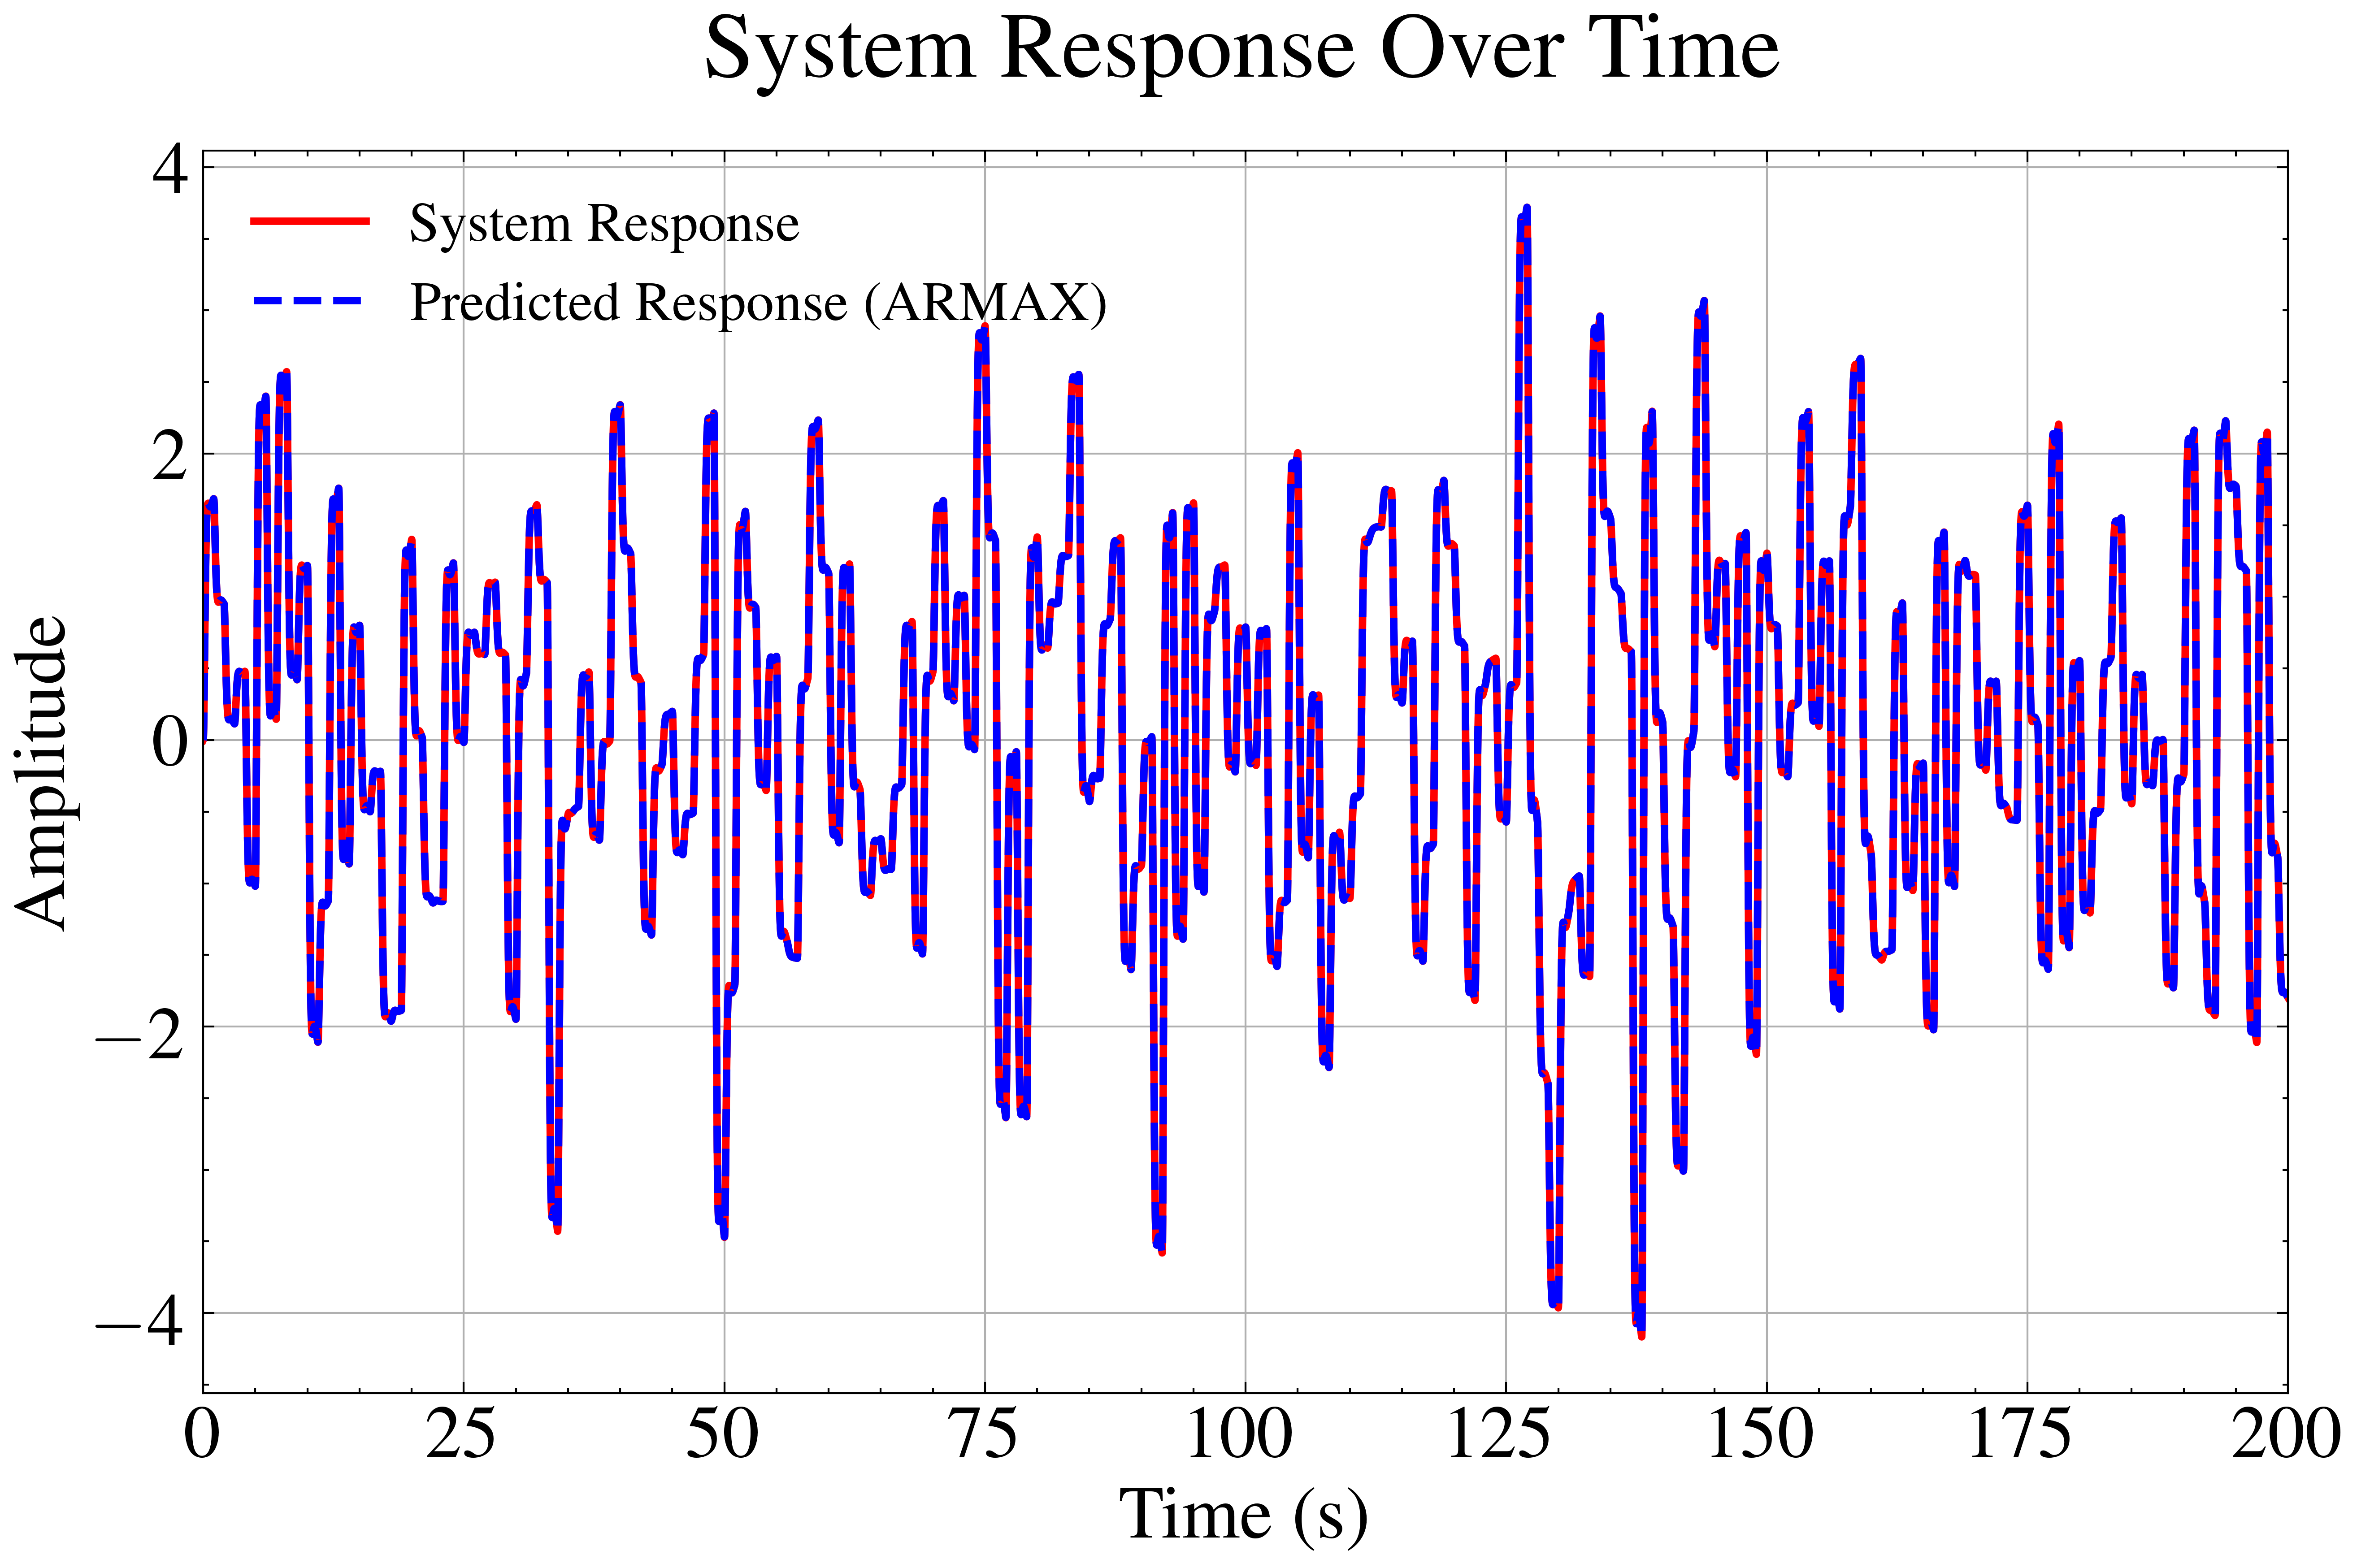

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

file_path = 'D:/UAS_Pemodelan_Sistem_Identifikasi/simulation_data.xlsx'
data = pd.read_excel(file_path)

time = data['Time']
input_signal = data['InputSignal']
system_response = data['SystemResponse']
ARMAX_predicted = data['ARMAX_Predicted']

plt.style.use('science')
plt.style.use('ieee')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time, system_response, label='System Response', linewidth=2, color='red')
ax.plot(time, ARMAX_predicted, label='Predicted Response (ARMAX)', linewidth=2, color='blue')

ax.set_xlim([0, 200])

ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)

legend = ax.legend(fontsize=15)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')


ax.set_title('System Response Over Time', fontsize=25, pad=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True)

plt.show()

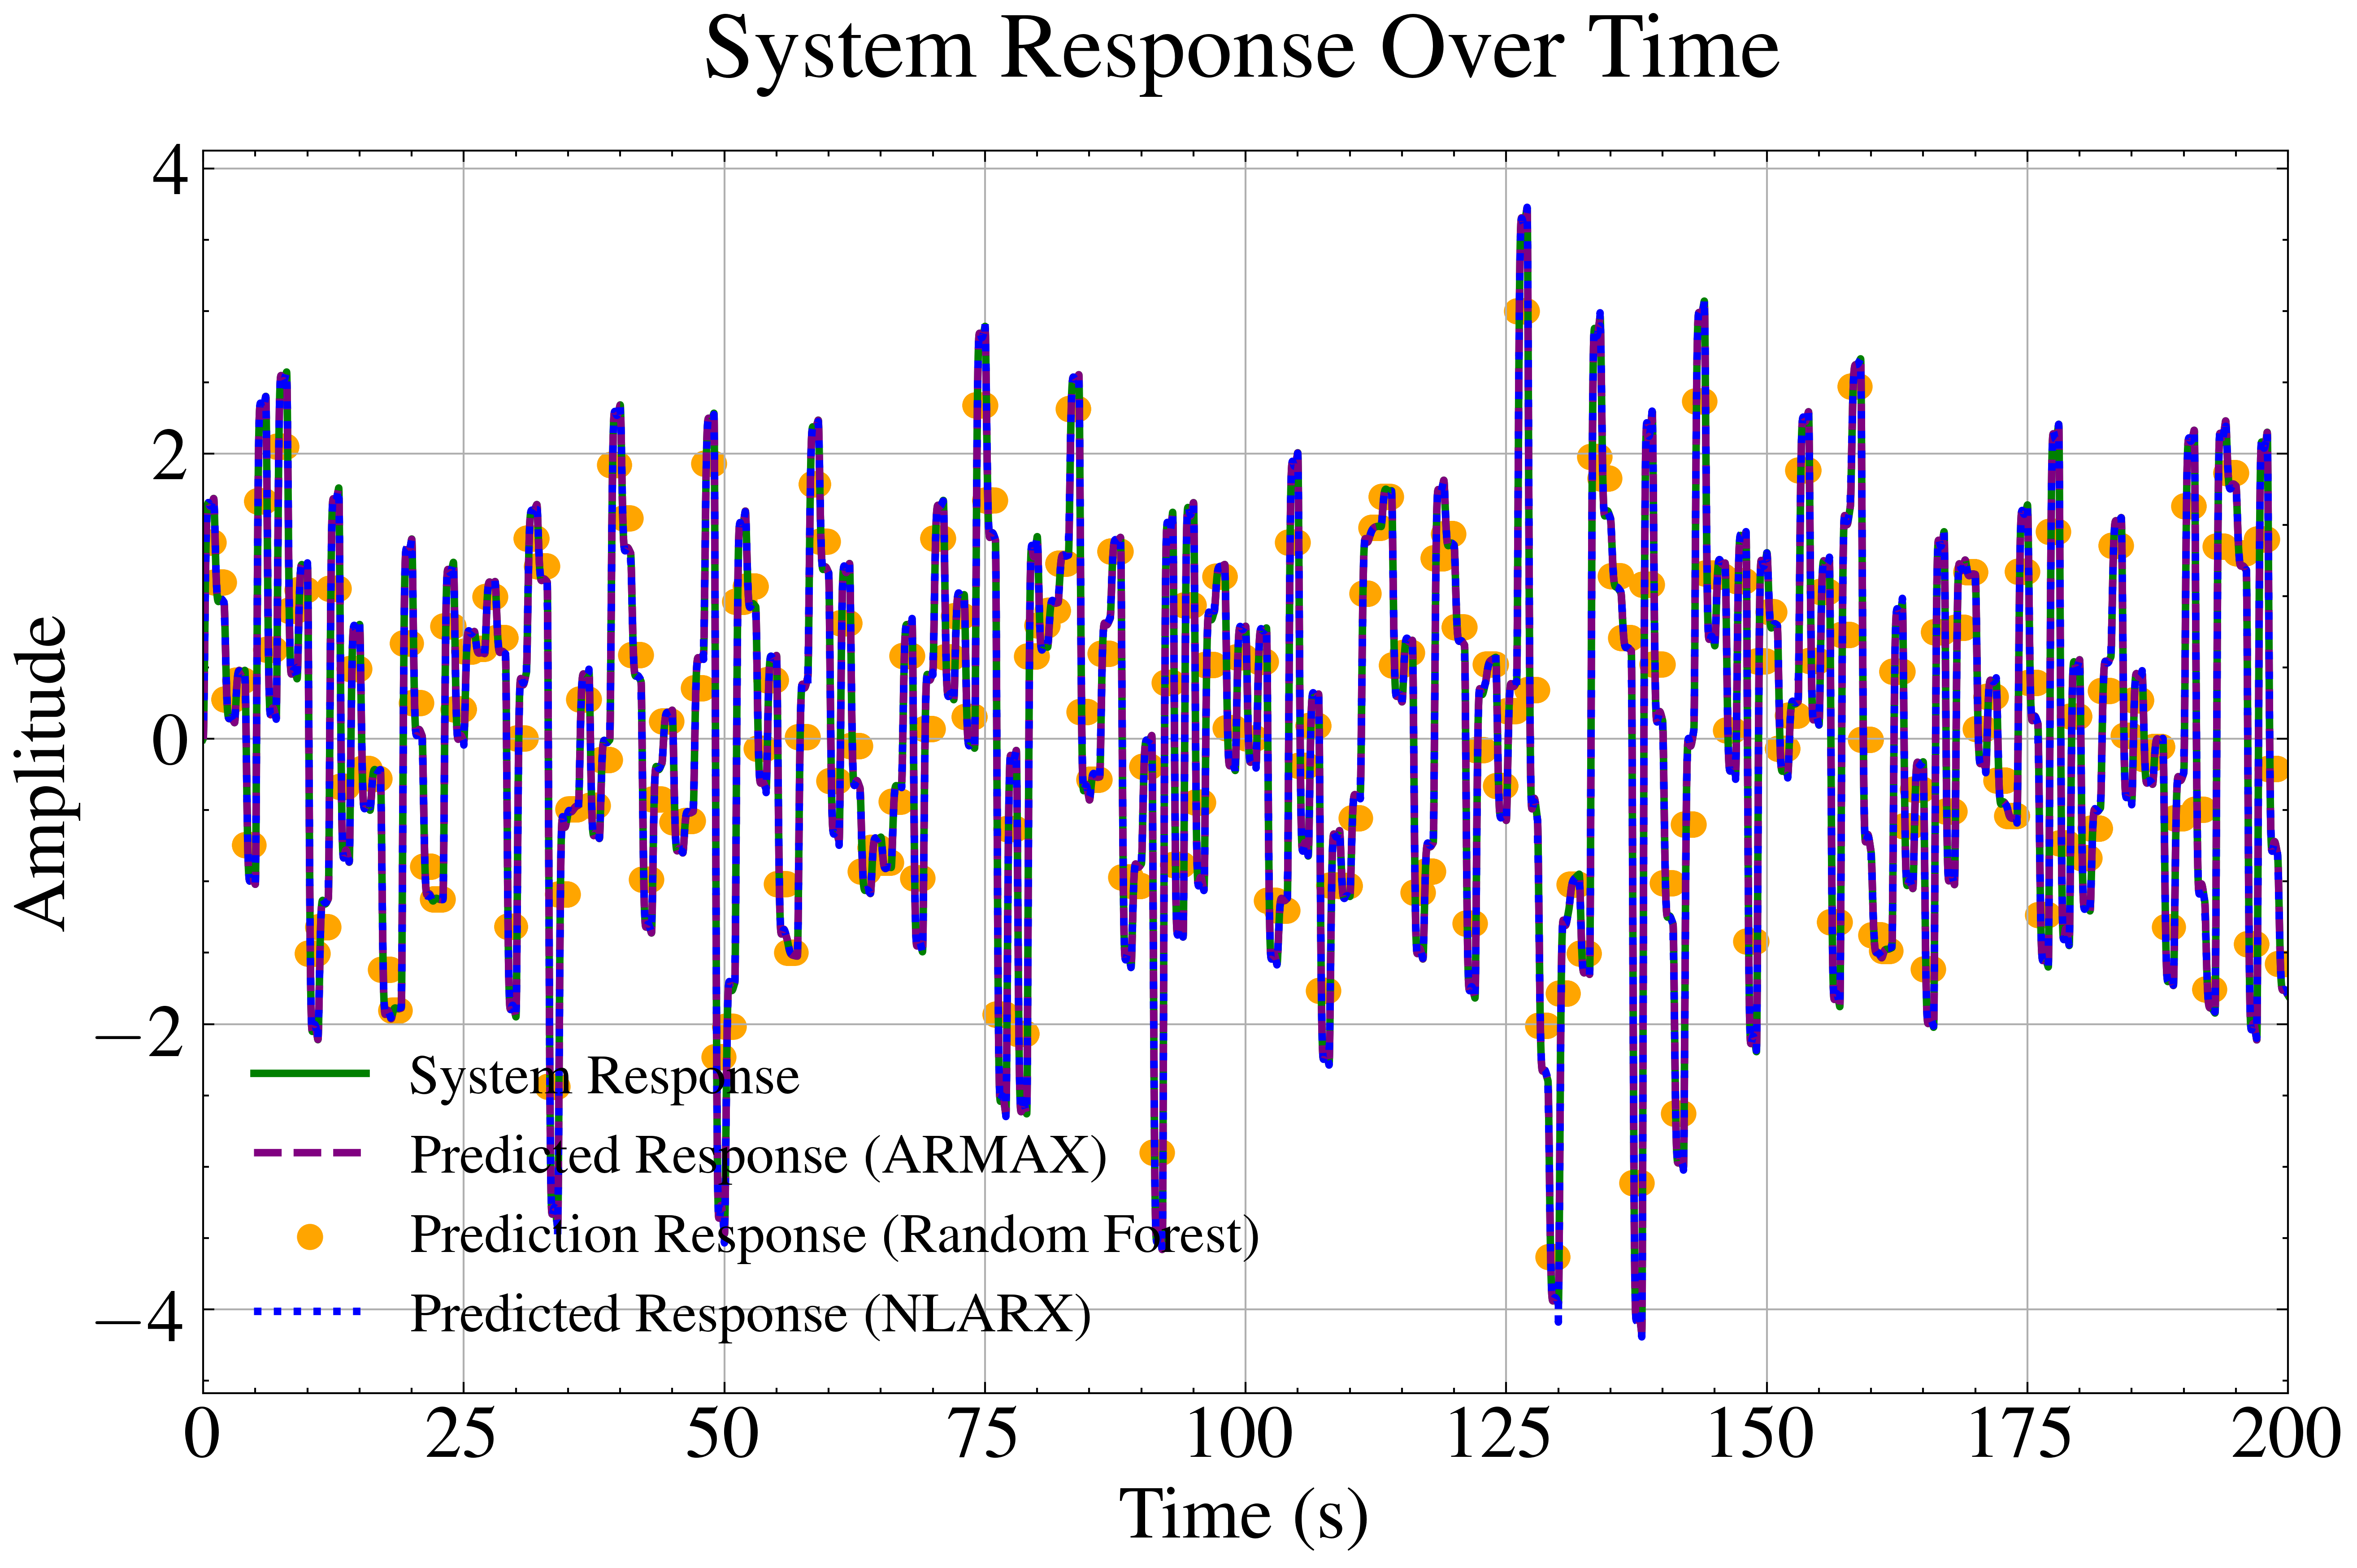

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

file_path = 'D:/UAS_Pemodelan_Sistem_Identifikasi/simulation_data.xlsx'
data = pd.read_excel(file_path)

time = data['Time']
input_signal = data['InputSignal']
system_response = data['SystemResponse']
ARMAX_predicted = data['ARMAX_Predicted']

plt.style.use('science')
plt.style.use('ieee')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time, system_response, label='System Response', linewidth=2, color='green')
ax.plot(time, ARMAX_predicted, label='Predicted Response (ARMAX)', linewidth=2, color='purple')
ax.scatter(data['Time'].iloc[X_test.index], y_pred, label='Prediction Response (Random Forest)', color='orange')
ax.plot(time[n_lags:], np.concatenate([y_train_pred, y_test_pred]), label='Predicted Response (NLARX)', linewidth=2, color='blue')

ax.set_xlim([0, 200])

ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)

legend = ax.legend(fontsize=15)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')


ax.set_title('System Response Over Time', fontsize=25, pad=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True)

plt.show()